In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import os
import scipy.cluster.hierarchy as sch #Hierachical Clustering

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
df=pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
df.shape

(8950, 18)

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# Suppression des valeurs nulles et de la colonne "CUST_ID"
df = df.drop("CUST_ID", axis=1)
df = df.dropna(axis=0)
df.shape


(8636, 17)

###  les corrélations entre les différentes variables

<AxesSubplot:>

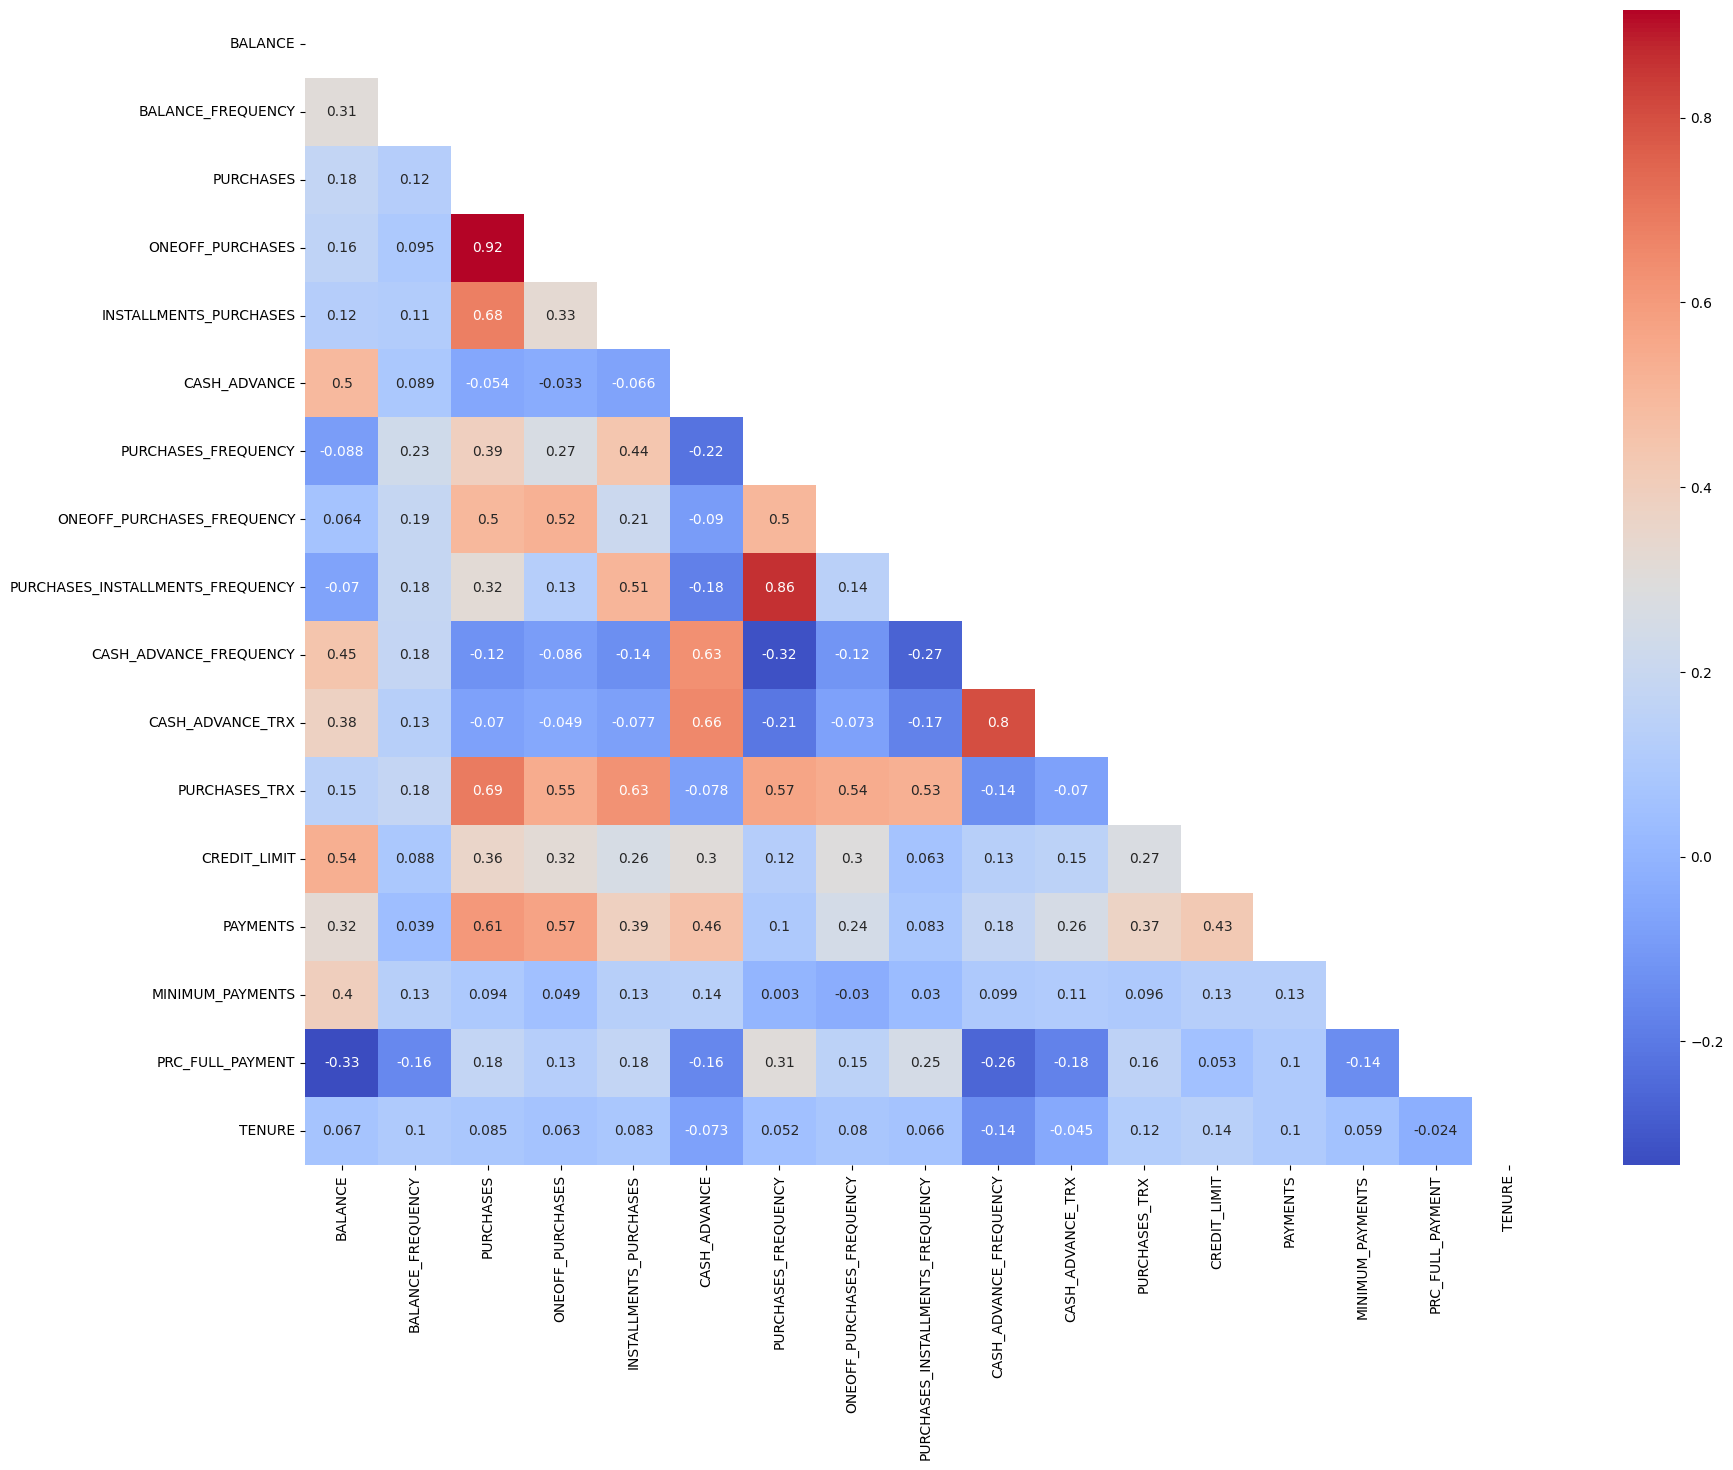

In [7]:
plt.figure(figsize=(20, 15))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm', mask=mask)

#### nous remarquons qu'il y'a une forte corrélation etre purchases et ONEOFF_PURCHASES

In [8]:
model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric


In [9]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,2
1,2
2,2
3,2
4,2
...,...
8631,2
8632,2
8633,2
8634,2


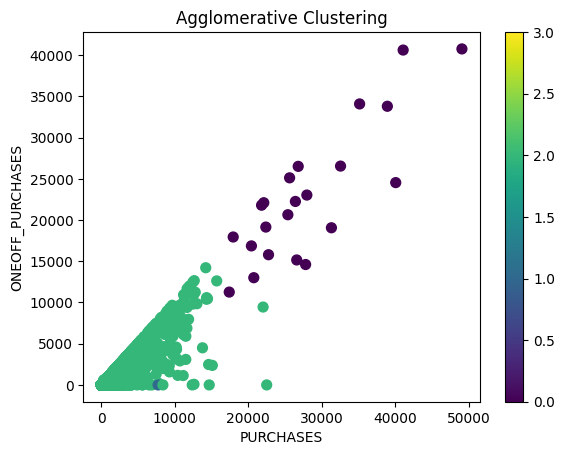

In [10]:
# ici pour tracer le clust on utilise que 2 entrées ou bien ou peut tout utiliser j'y arrive pas je regardé des tutos des projets git mais toujours pas

fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df['PURCHASES'] , df["ONEOFF_PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("ONEOFF_PURCHASES")
plt.colorbar(scatter)

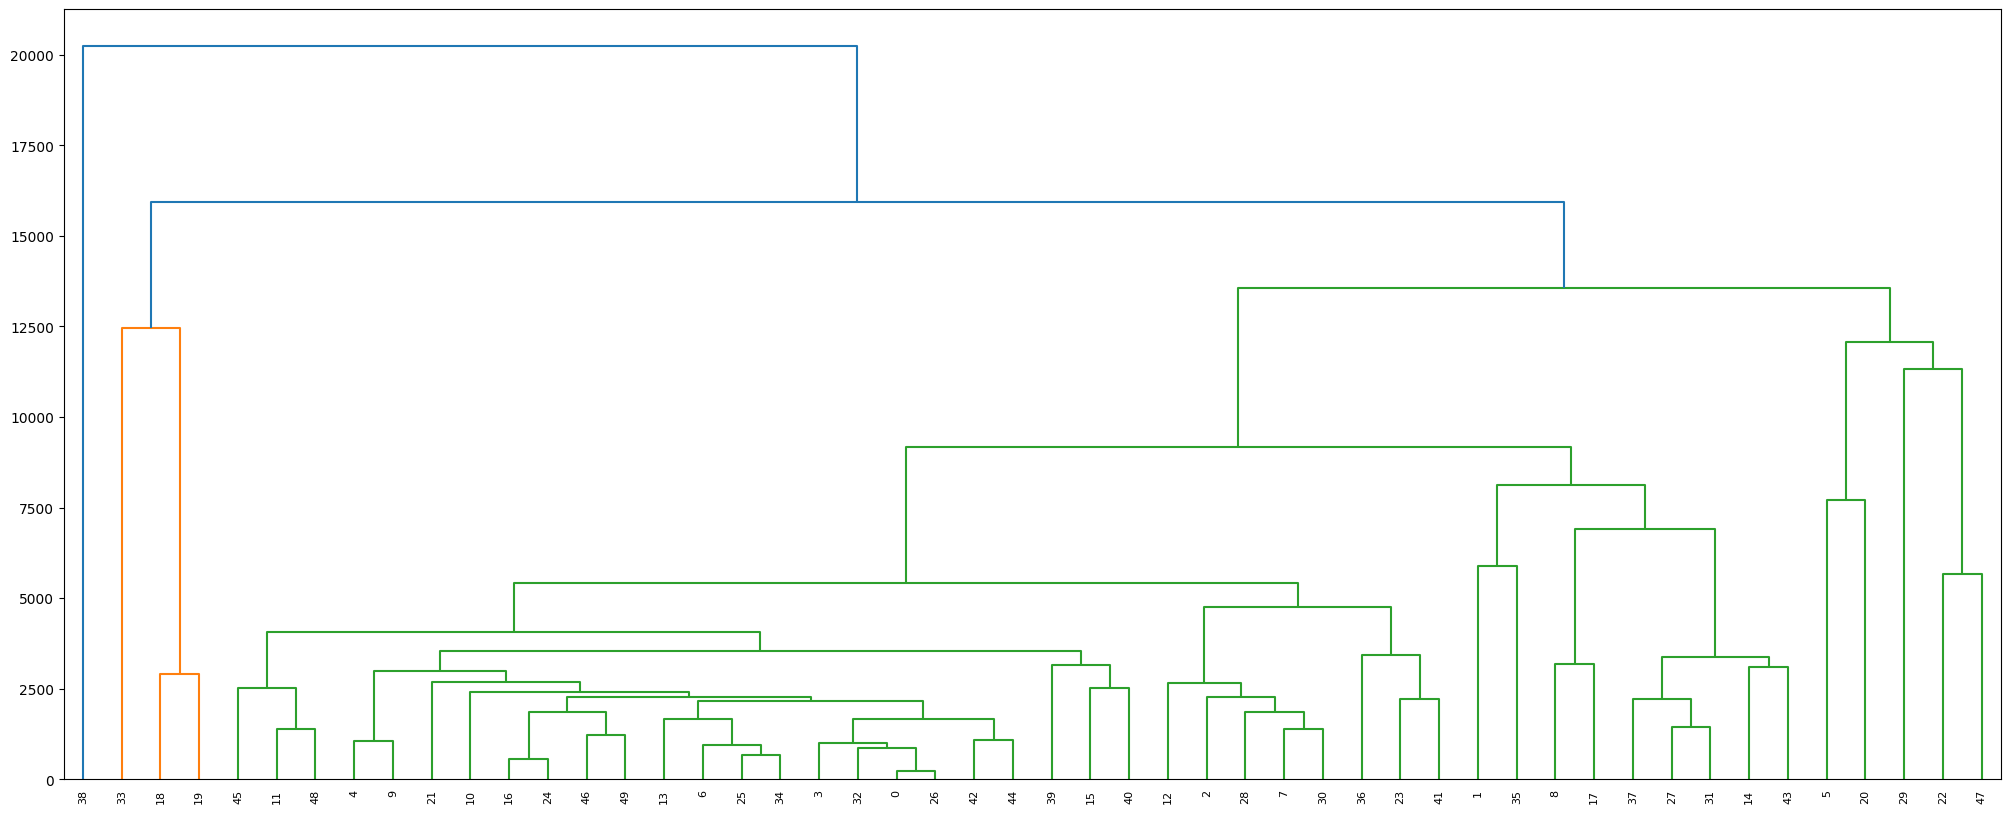

In [11]:
# Dendrogram
plt.figure(figsize=(25,10))
dendrogramme = sch.dendrogram(sch.linkage(df[:50], method='average')) #Limitons à 50

# KMeans

In [17]:
sum_of_squared_distance = []
K=range(1,15)
for k in K:
    km=KMeans(n_clusters=k)  
    km=km.fit(df)
    sum_of_squared_distance.append(km.inertia_)

Text(0.5, 1.0, 'elbow method for optimal k')

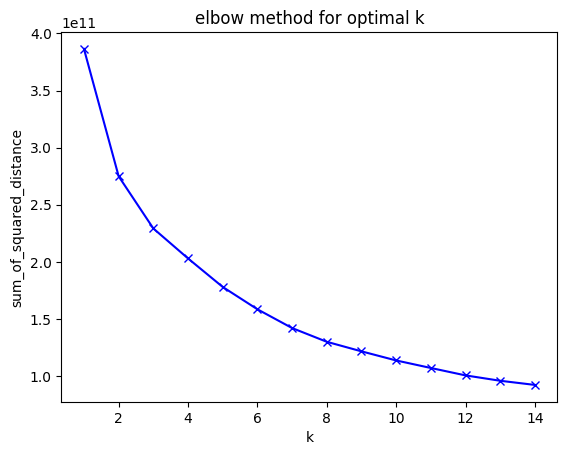

In [20]:
plt.plot(K,sum_of_squared_distance, 'bx-')
plt.xlabel("k")
plt.ylabel("sum_of_squared_distance")
plt.title("elbow method for optimal k")

### la meilleur valeur de K=5

In [16]:
# ce code je l'ai pris au niveau du cours et je l'ai modifié mais toujurs rien.
plt.scatter(df["BALANCE"][df.label == 0], df["PURCHASE"][df.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(df["BALANCE"][df.label == 1], df["PURCHASE"][df.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(df["BALANCE"][df.label == 2], df["PURCHASE"][df.label == 2],s=80,c='green',label='Target')
plt.scatter(df["BALANCE"][df.label == 3], df["PURCHASE"][df.label == 3],s=80,c='cyan',label='Careless')
plt.scatter(df["BALANCE"][df.label == 4], df["PURCHASE"][df.label == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', 
label = 'Centroids')
plt.title('Customers Segmentation based on their Credit Card usage bhaviour')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASE')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'label'